### Imports

In [1]:
from ActiveTestingRegressionMV import *
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

### Energy Efficiency Dataset from UCI Machine Learning Repository

In [2]:
df = pd.read_excel('ENB2012_data.xlsx')

X = df.iloc[:,:7].to_numpy()

y = df['Y1'].to_numpy()

X = StandardScaler().fit_transform(X)

# D_train and D_test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=15) # 11

# train 
reg_learner = Pipeline([
            ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
            ("std", StandardScaler()),
            ("linear_regression", Ridge())])


reg_learner.fit(X_train, y_train)

y_pred = reg_learner.predict(X_test)

full_loss = np.sqrt(quadratic_loss(y_test, y_pred).mean())

print(full_loss, X_test.shape)

2.407898847157457 (384, 7)


### Regression NN (No Dropout)

Trial 30 Complete [00h 00m 02s]
mean_squared_error: 14.904452323913574

Best mean_squared_error So Far: 5.462583065032959
Total elapsed time: 00h 01m 04s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1024      
                                                                 
 dense_6 (Dense)             (None, 384)               49536     
                                                                 
 dense_7 (Dense)             (None, 480)               184800    
                                                                 
 dense_8 (Dense)             (None, 160)               76960     
                                                                 
 dense_9 (Dense)             (None, 32)                5152      
                                                                 
 dense_10 (Dense)            (No

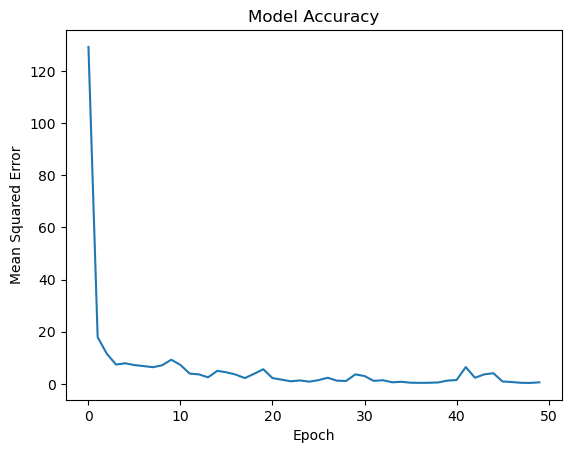

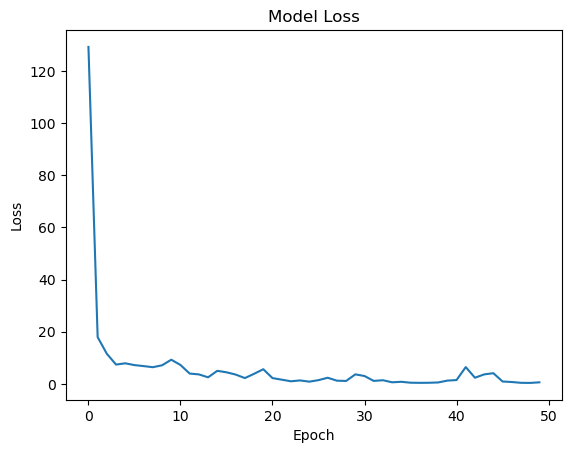

In [3]:
# Tune for data using gridsearch and create model
reg_evaluator = create_model(X_train, y_train, model_type = "boot", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Refit Only

---38---
12/12 [==============================] - 0s 1ms/step
---76---
12/12 [==============================] - 0s 1ms/step
---115---
12/12 [==============================] - 0s 2ms/step
---153---
12/12 [==============================] - 0s 2ms/step
---192---
12/12 [==============================] - 0s 2ms/step


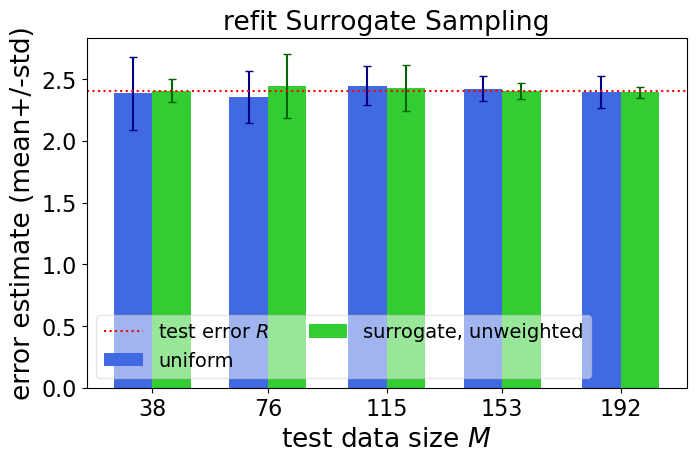

,Uniform R,Uniform Stddev,Nonuniform R,Nonuniform Stddev
38,2.384316,0.293404,2.406256,0.094918
76,2.357553,0.209512,2.443598,0.257134
115,2.447937,0.155027,2.429601,0.186309
153,2.422897,0.099314,2.401660,0.065424
192,2.394938,0.126851,2.393357,0.044257


Full Test R Value: 2.407898847157457


In [4]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, model_type = "refit", n_reps = 30, num_exp = 30, plot_title = "refit")

In [5]:
time_weight(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 1, n_reps = 30, model_type = "refit", plot_title = "refit")

---38---
12/12 [==============================] - 0s 1ms/step
---76---
12/12 [==============================] - 0s 2ms/step
---115---
12/12 [==============================] - 0s 1ms/step
---153---
12/12 [==============================] - 0s 1ms/step
---192---
12/12 [==============================] - 0s 0s/step
[7.46623516 7.08702874 7.07800245 7.12779069 7.14136457]


### Bootstrap Surrogate Sampling

In [6]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, model_type = "boot", n_reps = 30, num_exp = 30, plot_title = "Bootstrap")

---38---
12/12 [==============================] - 0s 1ms/step
---76---
12/12 [==============================] - 0s 1ms/step


In [ ]:
time_weight(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 1, n_reps = 30, model_type = "boot", plot_title = "Bootstrap")

### Dropout Regression Model

In [ ]:
# Tune for data using hyperband and create model
reg_evaluator = create_model(X_train, y_train, model_type = "drop", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Dropout Surrogate Sampling

In [ ]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, model_type = "drop", n_reps = 30, num_exp = 30, plot_title = "Dropout")

In [ ]:
time_weight(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 1, n_reps = 30, model_type = "drop", plot_title = "Dropout")

### Probabilistic Layer Regression Model

In [ ]:
# Tune for data using hyperband and create model
reg_evaluator = create_model(X_train, y_train, model_type = "prob", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Probabilistic Layer Surrogate Sampling

In [ ]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, n_reps = 30, model_type = "prob", num_exp = 30, plot_title = "Prob Layer")

In [ ]:
time_weight(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 1, n_reps = 30, model_type = "prob", plot_title = "Prob Layer")

### Variational Inference Regression Model

In [ ]:
reg_evaluator = build_vi(X_train, y_train)

In [ ]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, n_reps = 30, model_type ="vi", num_exp = 30, plot_title = "MFVI")

In [ ]:
time_weight(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 1, n_reps = 30, model_type = "vi", plot_title = "MFVI")

In [ ]:
Boot = np.asarray([4.16388607, 4.10224295, 4.18374753, 4.15024757, 4.13371992])
Drop = np.asarray([5.01902723, 5.00042439, 4.98384762, 4.98375821, 4.98386836])
Prob = np.asarray([1.98511195, 1.98657298, 1.96230912, 2.00463223, 1.99605298])
MFVI = np.asarray([1.77576971, 1.76654172, 1.76621842, 1.76705861, 1.76840782])

x = np.asarray([38, 76, 115, 153, 192])

plt.rcParams.update({'font.size': 16, "figure.figsize": (8, 5)})
plt.bar(x,Boot, label="Bootstrap", width=2)
plt.bar(x,Drop, label="Dropout")
plt.bar(x,Prob, label="Probabilistic")
plt.bar(x,MFVI, label="MFVI")
plt.legend()
plt.ylim(0,10)
plt.xticks(x)
plt.show()

In [ ]:
data = (38, 76, 115, 153, 192)
technique = {
    'Refit': (7.46623516, 7.08702874, 7.07800245, 7.12779069, 7.14136457),
    'Bootstrap': (4.16388607, 4.10224295, 4.18374753, 4.15024757, 4.13371992),
    'Dropout': (5.01902723, 5.00042439, 4.98384762, 4.98375821, 4.98386836),
    'Probabilistic': (1.98511195, 1.98657298, 1.96230912, 2.00463223, 1.99605298),
    'MFVI': (1.77576971, 1.76654172, 1.76621842, 1.76705861, 1.76840782),
}

x = np.arange(len(data))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

plt.rcParams.update({'font.size': 16, "figure.figsize": (10, 5)})
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in technique.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, data)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 8)
ax.set_ylabel("time (s)")
ax.set_xlabel("test data size M")

plt.show()